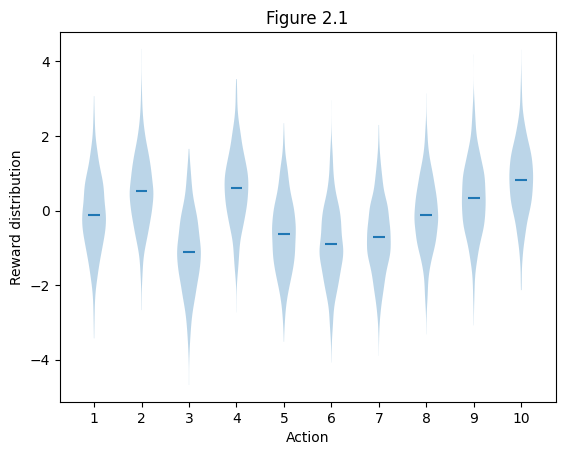

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# 10 armed testbed
k = 10 # number of arms
n_bandits = 2000 # number of bandits
time_steps = 1000 # total time steps
mu, sigma = 0, 1 # mean, standard deviation (here, variance = 1)

reward_dist = np.random.normal(mu, sigma, k)
k_reward_dist = [np.random.normal(r, sigma, time_steps) for r in reward_dist]

# plotting Figure 2.1
x_vals = range(1,k+1)
plt.title('Figure 2.1')
plt.violinplot(k_reward_dist, showextrema=False, showmeans=True)
plt.xticks(x_vals)
plt.xlabel('Action')
plt.ylabel('Reward distribution')
plt.show()

Running step  2 for epsilon = 0
Running step  3 for epsilon = 0
Running step  4 for epsilon = 0
Running step  5 for epsilon = 0
Running step  6 for epsilon = 0
Running step  7 for epsilon = 0
Running step  8 for epsilon = 0
Running step  9 for epsilon = 0
Running step  10 for epsilon = 0
Running step  11 for epsilon = 0
Running step  12 for epsilon = 0
Running step  13 for epsilon = 0
Running step  14 for epsilon = 0
Running step  15 for epsilon = 0
Running step  16 for epsilon = 0
Running step  17 for epsilon = 0
Running step  18 for epsilon = 0
Running step  19 for epsilon = 0
Running step  20 for epsilon = 0
Running step  21 for epsilon = 0
Running step  22 for epsilon = 0
Running step  23 for epsilon = 0
Running step  24 for epsilon = 0
Running step  25 for epsilon = 0
Running step  26 for epsilon = 0
Running step  27 for epsilon = 0
Running step  28 for epsilon = 0
Running step  29 for epsilon = 0
Running step  30 for epsilon = 0
Running step  31 for epsilon = 0
Running step  32 f

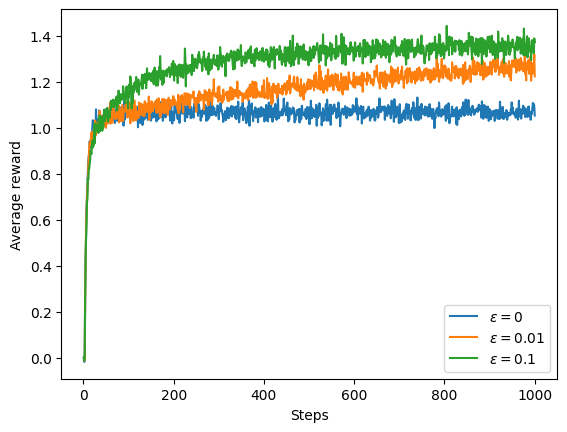

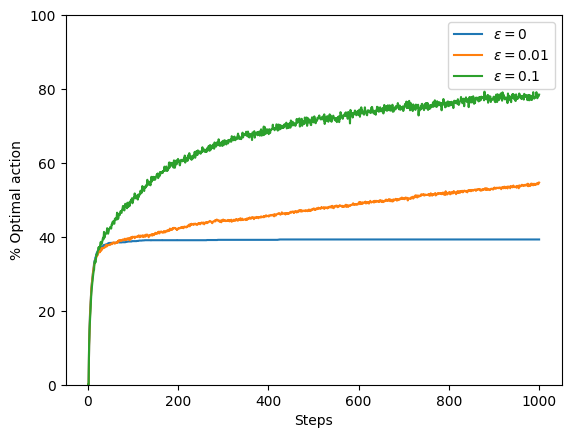

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

# 10 armed testbed
k = 10 # number of arms
n_bandits = 2000 # number of bandits
time_steps = 1000 # total time steps
mu, sigma = 0, 1 # mean, standard deviation (here, variance = 1)

# true values
Q_true = np.random.normal(mu, sigma, (n_bandits, k)) # The true action values q*(a)
opt_action = np.argmax(Q_true, 1) # True optimal action

# for plotting
x_vals = range(1, time_steps+1)
fig1 = plt.figure(1).gca()
fig2 = plt.figure(2).gca()

# epsilon-greedy algorithm
epsilon = [0, 0.01, 0.1]
for ep in epsilon: # each epsilon is a new experiment
    # step 0
    Q_values = np.zeros((n_bandits,k))
    rewards = [0] # average reward in each time step
    opt_action_rate = [0] # rate of taking optimal action

    # step 1
    N_values = np.ones((n_bandits,k)) # at step 1, every action is taken once
    Q_init = np.random.normal(Q_true, sigma) # rewards for taking each action once
    opt_action_rate.append(0) # optimal action not taken
    rewards.append(np.mean(Q_init)) # average reward for taking each action once

    # step 2-time_steps
    for t in range(2,time_steps):
        print('Running step ', t, 'for epsilon =', ep)
        step_rewards = [] # rewards taken in this step
        opt_action_taken = 0 # number of times optimal action is taken in this step
        for i in range(n_bandits): # for each bandit problem
            if np.random.random() < ep:
                act = np.random.randint(k) # random action selected
            else:
                act = np.argmax(Q_values[i]) # greedy action selected
            if act == opt_action[i]:
                opt_action_taken += 1 # if the action is optimal, increase the count
            R = np.random.normal(Q_true[i][act], sigma) # take reward for action 'act'
            step_rewards.append(R) # add the reward to step rewards
            N_values[i][act] += 1 # increase the number of action taken
            Q_values[i][act] += (R-Q_values[i][act])/N_values[i][act] # Update the Q values
        average_step_reward = np.mean(step_rewards) # average reward in this step
        rewards.append(average_step_reward) # add the average reward
        opt_action_rate.append(opt_action_taken*100/n_bandits) # percentage of optimal action taken added
    fig1.plot(x_vals,rewards)
    fig2.plot(x_vals,opt_action_rate)
fig1.set_xlabel("Steps")
fig2.set_xlabel("Steps")
fig1.set_ylabel("Average reward")
fig2.set_ylabel("% Optimal action")
fig1.legend((r'$\epsilon=$'+str(epsilon[0]), r'$\epsilon=$'+str(epsilon[1]), r'$\epsilon=$'+str(epsilon[2])), loc='best')
fig2.legend((r'$\epsilon=$'+str(epsilon[0]), r'$\epsilon=$'+str(epsilon[1]), r'$\epsilon=$'+str(epsilon[2])), loc='best')
fig2.set_ylim(0,100)
plt.show()


Running step  2 for experiment = sample_average
Running step  3 for experiment = sample_average
Running step  4 for experiment = sample_average
Running step  5 for experiment = sample_average
Running step  6 for experiment = sample_average
Running step  7 for experiment = sample_average
Running step  8 for experiment = sample_average
Running step  9 for experiment = sample_average
Running step  10 for experiment = sample_average
Running step  11 for experiment = sample_average
Running step  12 for experiment = sample_average
Running step  13 for experiment = sample_average
Running step  14 for experiment = sample_average
Running step  15 for experiment = sample_average
Running step  16 for experiment = sample_average
Running step  17 for experiment = sample_average
Running step  18 for experiment = sample_average
Running step  19 for experiment = sample_average
Running step  20 for experiment = sample_average
Running step  21 for experiment = sample_average
Running step  22 for experim

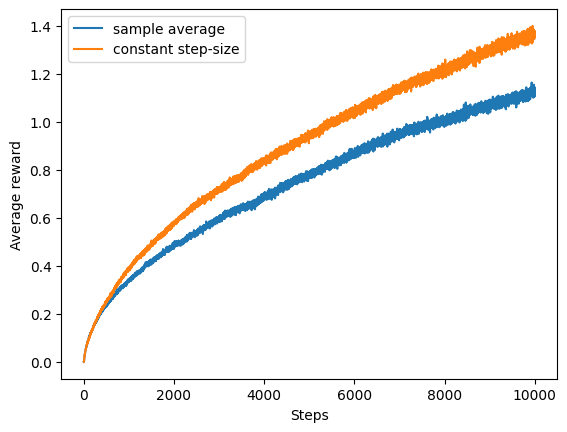

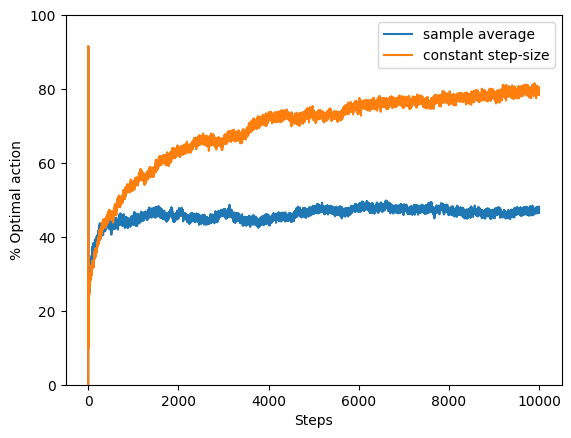

In [13]:
# Exercise 2.5
import numpy as np
import matplotlib.pyplot as plt 

# 10 armed testbed
k = 10 # number of arms
n_bandits = 2000 # number of bandits
time_steps = 10000 # total time steps
mu, sigma = 0, 0.01 # mean, standard deviation

# for plotting
x_vals = range(1, time_steps+1)
fig1 = plt.figure(1).gca()
fig2 = plt.figure(2).gca()

# Experiments: sample average and constant step size
ep = 0.1
experiment = ['sample_average', 'constant_step_size']
for exp in experiment: 

    # true values
    Q_true = np.zeros((n_bandits, k)) # The true action values q*(a) are 0s initially
    opt_action = np.argmax(Q_true, 1) # True optimal action

    # step 0
    Q_values = np.zeros((n_bandits,k))
    rewards = [0] # average reward in each time step
    opt_action_rate = [0] # rate of taking optimal action

    # step 1
    N_values = np.ones((n_bandits,k)) # at step 1, every action is taken once
    opt_action_rate.append(0) # optimal action not taken
    rewards.append(0) # average reward for taking each action once

    # step 2-time_steps
    for t in range(2,time_steps):
        print('Running step ', t, 'for experiment =', exp)
        step_rewards = [] # rewards taken in this step
        opt_action_taken = 0 # number of times optimal action is taken in this step
        for i in range(n_bandits): # for each bandit problem
            if np.random.random() < ep:
                act = np.random.randint(k) # random action selected
            else:
                act = np.argmax(Q_values[i]) # greedy action selected
            if act == opt_action[i]:
                opt_action_taken += 1 # if the action is optimal, increase the count
            R = np.random.normal(Q_true[i][act], sigma) # take reward for action 'act'
            step_rewards.append(R) # add the reward to step rewards
            N_values[i][act] += 1 # increase the number of action taken
            alpha = 1/N_values[i][act] if (exp=='sample_average') else 0.1
            Q_values[i][act] += (R-Q_values[i][act])*alpha # Update the Q values
        Q_true += np.random.normal(mu, sigma, (n_bandits, k))
        opt_action = np.argmax(Q_true, 1) # True optimal action
        average_step_reward = np.mean(step_rewards) # average reward in this step
        rewards.append(average_step_reward) # add the average reward
        opt_action_rate.append(opt_action_taken*100/n_bandits) # percentage of optimal action taken added
    fig1.plot(x_vals,rewards)
    fig2.plot(x_vals,opt_action_rate)
fig1.set_xlabel("Steps")
fig2.set_xlabel("Steps")
fig1.set_ylabel("Average reward")
fig2.set_ylabel("% Optimal action")
fig1.legend((r'sample average', r'constant step-size'), loc='best')
fig2.legend((r'sample average', r'constant step-size'), loc='best')
fig2.set_ylim(0,100)
plt.show()
